In [6]:
import h5py
import numpy as np

import matplotlib.pyplot as plt

#Set fonts
from matplotlib import rc, rcParams, cm
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
#Use tex for math
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [7]:
def PlotLine(y = 2*56.25/25.4, x = 1.5*56.25/25.4, dpi=100):
    fig, ax = plt.subplots(figsize=(y, x), dpi=dpi, tight_layout=True)
    return ax

### Read results

In [8]:
nSteps = 20

time = np.zeros(nSteps)
con = np.zeros(nSteps)

fileName = "ChargingHT990.diff.out.hdf5"
fh5 = h5py.File(fileName, "r")

for iStep in range(nSteps):
    
    time[iStep] = fh5["Time"]["Step_"+str(iStep)][()][0]
    con[iStep] = fh5["AvCon"]["Step_"+str(iStep)][()][0]
    
fh5.close()

con_wppm = con*1.008/(7.874)

Text(0, 0.5, 'Concentration (wppm)')

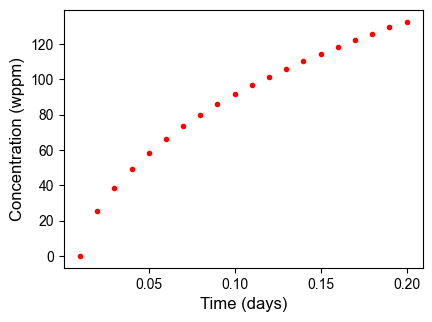

In [9]:
ax = PlotLine()

ax.plot(time/(3600*24), con_wppm, ".r", lw=1.5)

ax.set_xlabel("Time (days)", fontsize=12)
ax.set_ylabel("Concentration (wppm)", fontsize=12)

# plt.savefig("Charging.svg")